In [1]:
#import libraries
import yfinance as yf


In [2]:
#define dates
start = "2015-12-28"
training_end = "2018-03-05"
treatment_start = "2018-03-12"
end = "2018-07-16"
end_stock = "2018-07-17"

In [3]:
#get stock data
stocks = ["FB", "WMT", "DIS", "BMW.DE", "NVS",
          "GS", "GE", "KHC", "MCD", "CARL-B.CO"]
dataset = yf.download(stocks,
                      start = start,
                      end = end_stock,
                      interval = '1wk')

[*********************100%***********************]  10 of 10 completed


In [4]:
#getting only the data we want
dataset = dataset.iloc[:, :10]


In [5]:
#getting rid of unneeded level
dataset.columns = dataset.columns.droplevel()

In [6]:
#getting rid of NAs
dataset = dataset.dropna()

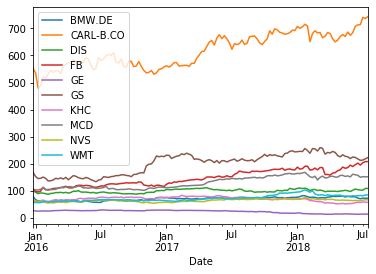

In [7]:
#Plotting data
dataset.plot()

In [8]:
#Create dataset with training period only
dataset_cor = dataset[dataset.index <= treatment_start]

#correlation matrix
dataset_cor.corr()
import pandas as pd
pd.set_option('display.max_columns', None)

In [9]:
#create dataset with the most correlated
final_series = dataset[["FB", "CARL-B.CO", "GS", "MCD", "NVS", "WMT"]]

In [10]:
#create pre and post period
pre_period = [start, training_end]
post_period = [treatment_start, end]

In [ ]:
#import library
from causalimpact import CausalImpact
impact = CausalImpact(data = final_series,
                      pre_period = pre_period,
                      post_period = post_period,
                      nseasons = [{'period': 52}],
                      priod_level_sd = None)

C:\Users\diogo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
